In [61]:
# Essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

# feature engineering libraries
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split

# model preparation libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# model evaluation libraries
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold

# model hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import joblib
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [62]:
# importing the dataset
df = pd.read_csv('WildBlueberryPollinationSimulationData.csv')
df.head(5)

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [63]:
df.tail(5)

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
772,772,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.486815,0.428012,33.447471,5333.873335
773,773,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.342841,0.377915,28.462005,3373.436842
774,774,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.404617,0.401670,30.748240,4203.027624
775,775,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,3.77,0.06,0.401538,0.399935,30.582161,4166.299735
776,776,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,24.00,0.39,0.384646,0.392303,29.742583,3943.131681


In [64]:
df.shape

(777, 18)

In [65]:
# checking high level info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

In [66]:
# Checking for any null values in the dataset
df.isnull().sum()

Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [67]:
# Checking the descriptive summary of the dataset

df.iloc[:,1:].describe()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


#### From the analysis of above summary we can notice that few of the features seems to skewed

In [68]:
# Checking number of unique values in each column

df.iloc[:,1:].nunique()

clonesize                 6
honeybee                  7
bumbles                  10
andrena                  12
osmia                    12
MaxOfUpperTRange          5
MinOfUpperTRange          5
AverageOfUpperTRange      5
MaxOfLowerTRange          5
MinOfLowerTRange          5
AverageOfLowerTRange      5
RainingDays               5
AverageRainingDays        5
fruitset                777
fruitmass               777
seeds                   777
yield                   777
dtype: int64

#### The features fruitset, fruitmass and seeds are having a unique value for each of the records

### Note:

According to data dictionary, we have 3 unknown fields, **fruitset, fruitmass, seeds** having high correlation values with the target varialble, the **yield** value.

1. we have a data dictionary of mutual correlated values of each of the fields with yield values
2. as this clearly is a regression problem, we can perform feature selection on the data
3. there are the following approaches:
    * f_regression() parameter for selecting by correlation
    * mutual_info_regression() for selecting by information gain
    * raw data features kept intact

# Univariate Analysis

In [69]:
# Univariate analysis on numeric columns
def univariate_analysis(column,nbins):
    print('\033[1m'+ "Description of " + column + '\033[0m' + '\n' )
    print(df[column].describe())
    print("----------------------------------------------------------------------------")
    
    
    plt.figure()
    print('\033[1m'+ "Distribution of " + column + '\033[0m' + '\n')
    sns.distplot(df[column], kde=True, color='g');
    plt.show()
    print("----------------------------------------------------------------------------")
    
    
    plt.figure()
    print('\033[1m'+ "BoxPlot of " + column + '\033[0m' + '\n')
    ax = sns.boxplot(x=df[column])
    plt.show()
    print("----------------------------------------------------------------------------")
    

Description of Row#

count    777.000000
mean     388.000000
std      224.444871
min        0.000000
25%      194.000000
50%      388.000000
75%      582.000000
max      776.000000
Name: Row#, dtype: float64
----------------------------------------------------------------------------
Distribution of Row#



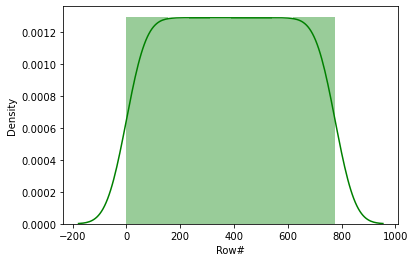

----------------------------------------------------------------------------
BoxPlot of Row#



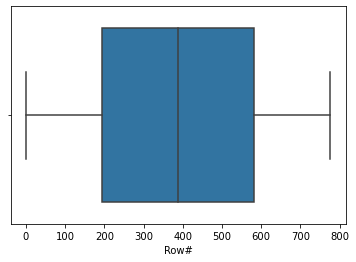

----------------------------------------------------------------------------
Description of clonesize

count    777.000000
mean      18.767696
std        6.999063
min       10.000000
25%       12.500000
50%       12.500000
75%       25.000000
max       40.000000
Name: clonesize, dtype: float64
----------------------------------------------------------------------------
Distribution of clonesize



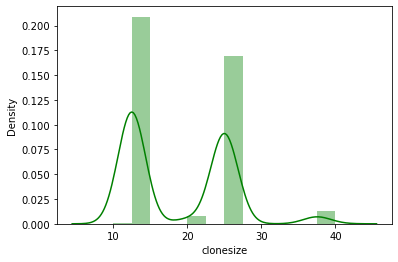

----------------------------------------------------------------------------
BoxPlot of clonesize



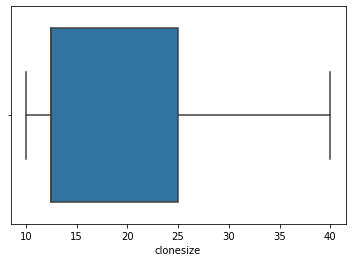

----------------------------------------------------------------------------
Description of honeybee

count    777.000000
mean       0.417133
std        0.978904
min        0.000000
25%        0.250000
50%        0.250000
75%        0.500000
max       18.430000
Name: honeybee, dtype: float64
----------------------------------------------------------------------------
Distribution of honeybee



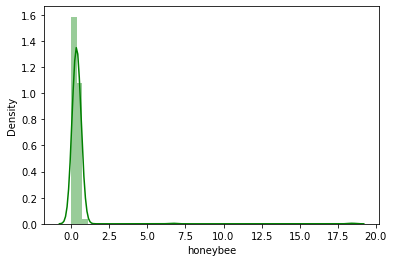

----------------------------------------------------------------------------
BoxPlot of honeybee



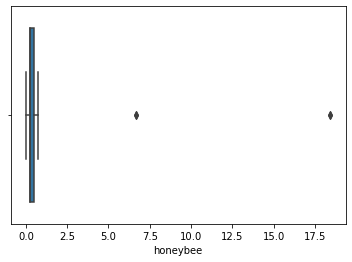

----------------------------------------------------------------------------
Description of bumbles

count    777.000000
mean       0.282389
std        0.066343
min        0.000000
25%        0.250000
50%        0.250000
75%        0.380000
max        0.585000
Name: bumbles, dtype: float64
----------------------------------------------------------------------------
Distribution of bumbles



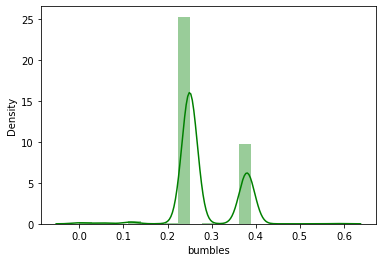

----------------------------------------------------------------------------
BoxPlot of bumbles



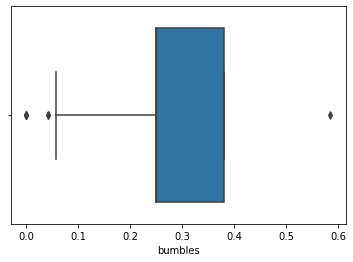

----------------------------------------------------------------------------
Description of andrena

count    777.000000
mean       0.468817
std        0.161052
min        0.000000
25%        0.380000
50%        0.500000
75%        0.630000
max        0.750000
Name: andrena, dtype: float64
----------------------------------------------------------------------------
Distribution of andrena



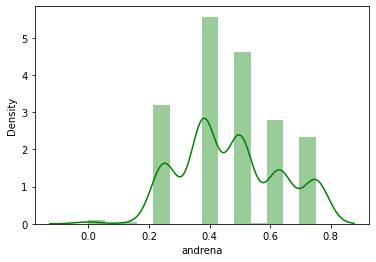

----------------------------------------------------------------------------
BoxPlot of andrena



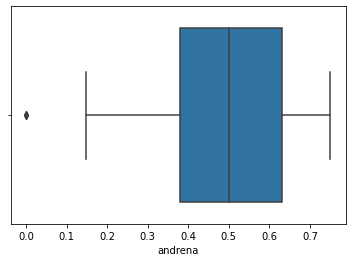

----------------------------------------------------------------------------
Description of osmia

count    777.000000
mean       0.562062
std        0.169119
min        0.000000
25%        0.500000
50%        0.630000
75%        0.750000
max        0.750000
Name: osmia, dtype: float64
----------------------------------------------------------------------------
Distribution of osmia



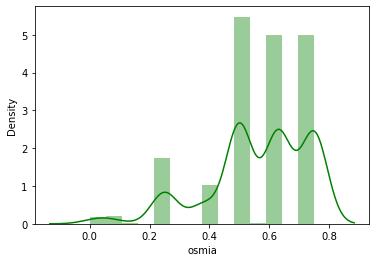

----------------------------------------------------------------------------
BoxPlot of osmia



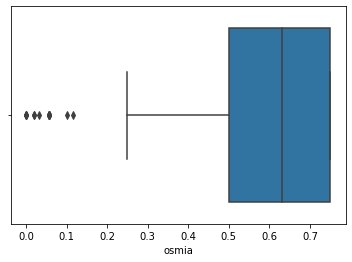

----------------------------------------------------------------------------
Description of MaxOfUpperTRange

count    777.000000
mean      82.277091
std        9.193745
min       69.700000
25%       77.400000
50%       86.000000
75%       89.000000
max       94.600000
Name: MaxOfUpperTRange, dtype: float64
----------------------------------------------------------------------------
Distribution of MaxOfUpperTRange



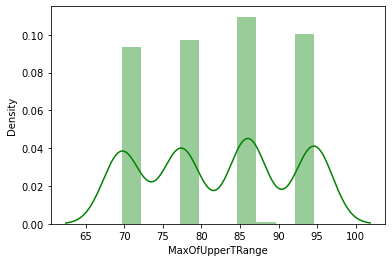

----------------------------------------------------------------------------
BoxPlot of MaxOfUpperTRange



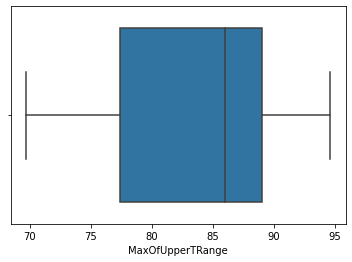

----------------------------------------------------------------------------
Description of MinOfUpperTRange

count    777.000000
mean      49.700515
std        5.595769
min       39.000000
25%       46.800000
50%       52.000000
75%       52.000000
max       57.200000
Name: MinOfUpperTRange, dtype: float64
----------------------------------------------------------------------------
Distribution of MinOfUpperTRange



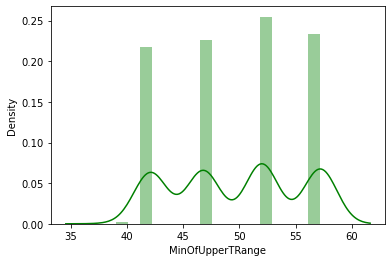

----------------------------------------------------------------------------
BoxPlot of MinOfUpperTRange



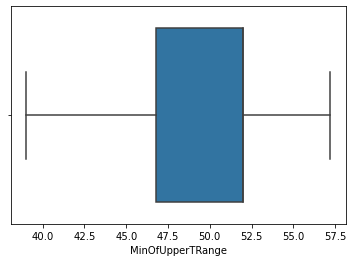

----------------------------------------------------------------------------
Description of AverageOfUpperTRange

count    777.000000
mean      68.723037
std        7.676984
min       58.200000
25%       64.700000
50%       71.900000
75%       71.900000
max       79.000000
Name: AverageOfUpperTRange, dtype: float64
----------------------------------------------------------------------------
Distribution of AverageOfUpperTRange



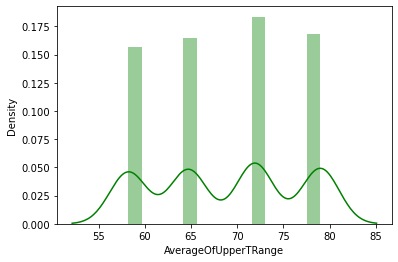

----------------------------------------------------------------------------
BoxPlot of AverageOfUpperTRange



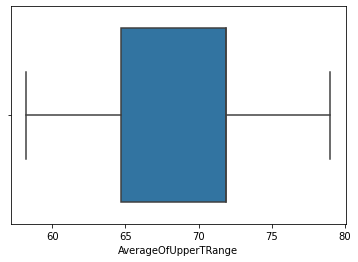

----------------------------------------------------------------------------
Description of MaxOfLowerTRange

count    777.000000
mean      59.309395
std        6.647760
min       50.200000
25%       55.800000
50%       62.000000
75%       66.000000
max       68.200000
Name: MaxOfLowerTRange, dtype: float64
----------------------------------------------------------------------------
Distribution of MaxOfLowerTRange



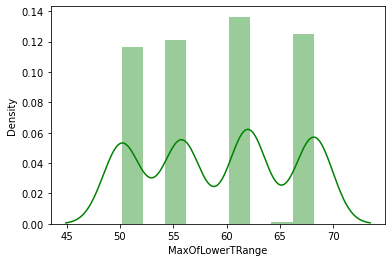

----------------------------------------------------------------------------
BoxPlot of MaxOfLowerTRange



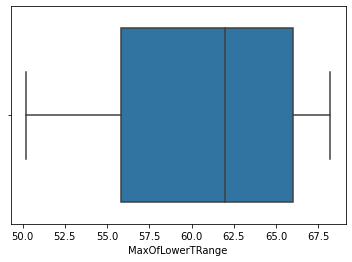

----------------------------------------------------------------------------
Description of MinOfLowerTRange

count    777.000000
mean      28.690219
std        3.209547
min       24.300000
25%       27.000000
50%       30.000000
75%       30.000000
max       33.000000
Name: MinOfLowerTRange, dtype: float64
----------------------------------------------------------------------------
Distribution of MinOfLowerTRange



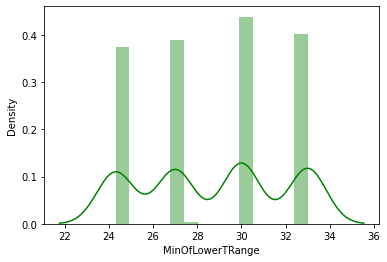

----------------------------------------------------------------------------
BoxPlot of MinOfLowerTRange



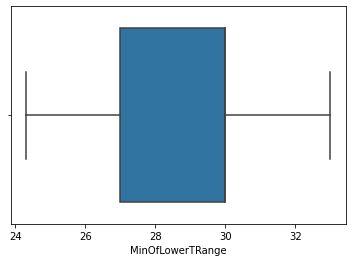

----------------------------------------------------------------------------
Description of AverageOfLowerTRange

count    777.000000
mean      48.613127
std        5.417072
min       41.200000
25%       45.800000
50%       50.800000
75%       50.800000
max       55.900000
Name: AverageOfLowerTRange, dtype: float64
----------------------------------------------------------------------------
Distribution of AverageOfLowerTRange



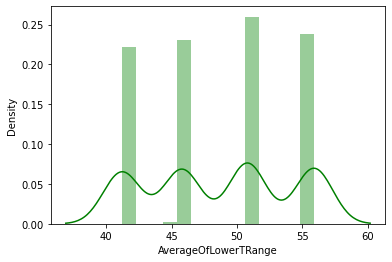

----------------------------------------------------------------------------
BoxPlot of AverageOfLowerTRange



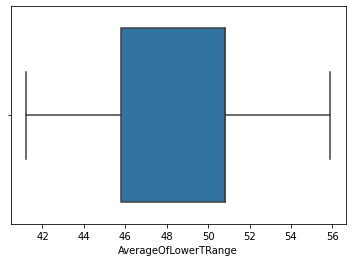

----------------------------------------------------------------------------
Description of RainingDays

count    777.000000
mean      18.309292
std       12.124226
min        1.000000
25%        3.770000
50%       16.000000
75%       24.000000
max       34.000000
Name: RainingDays, dtype: float64
----------------------------------------------------------------------------
Distribution of RainingDays



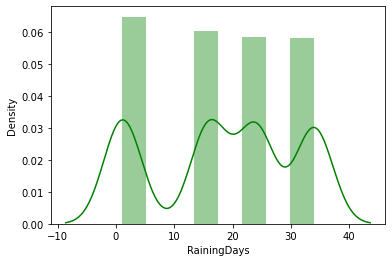

----------------------------------------------------------------------------
BoxPlot of RainingDays



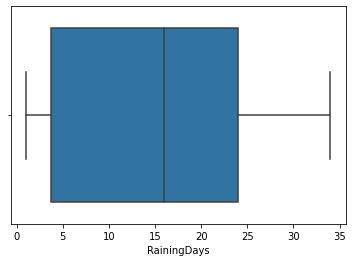

----------------------------------------------------------------------------
Description of AverageRainingDays

count    777.000000
mean       0.320000
std        0.171279
min        0.060000
25%        0.100000
50%        0.260000
75%        0.390000
max        0.560000
Name: AverageRainingDays, dtype: float64
----------------------------------------------------------------------------
Distribution of AverageRainingDays



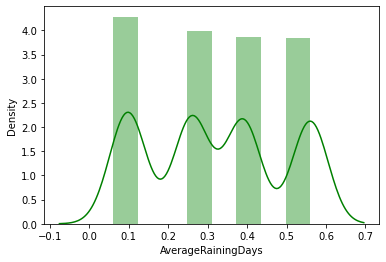

----------------------------------------------------------------------------
BoxPlot of AverageRainingDays



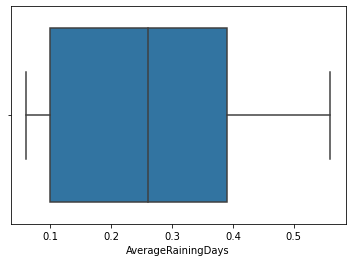

----------------------------------------------------------------------------
Description of fruitset

count    777.000000
mean       0.502121
std        0.079445
min        0.192732
25%        0.454725
50%        0.508297
75%        0.561297
max        0.652144
Name: fruitset, dtype: float64
----------------------------------------------------------------------------
Distribution of fruitset



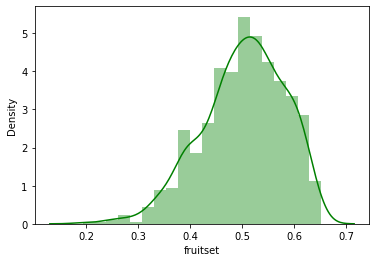

----------------------------------------------------------------------------
BoxPlot of fruitset



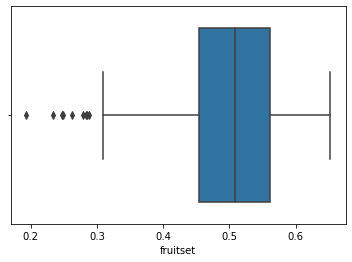

----------------------------------------------------------------------------
Description of fruitmass

count    777.000000
mean       0.445983
std        0.040333
min        0.311921
25%        0.416281
50%        0.445587
75%        0.476149
max        0.535660
Name: fruitmass, dtype: float64
----------------------------------------------------------------------------
Distribution of fruitmass



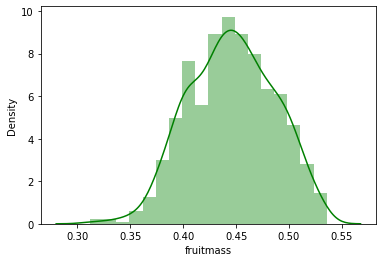

----------------------------------------------------------------------------
BoxPlot of fruitmass



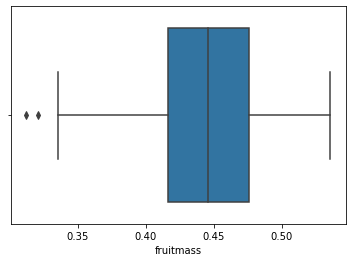

----------------------------------------------------------------------------
Description of seeds

count    777.000000
mean      36.122432
std        4.377889
min       22.079199
25%       33.116091
50%       36.166044
75%       39.239668
max       46.585105
Name: seeds, dtype: float64
----------------------------------------------------------------------------
Distribution of seeds



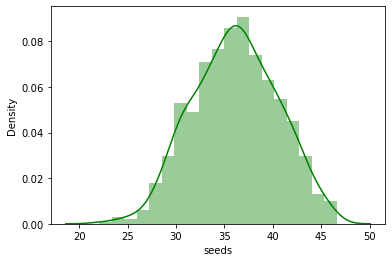

----------------------------------------------------------------------------
BoxPlot of seeds



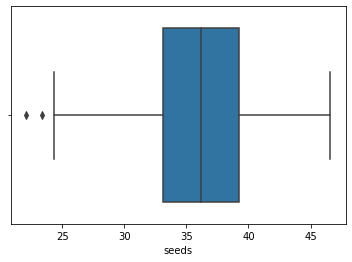

----------------------------------------------------------------------------
Description of yield

count     777.000000
mean     6012.849165
std      1356.955318
min      1637.704022
25%      5124.854901
50%      6107.382466
75%      7022.189731
max      8969.401842
Name: yield, dtype: float64
----------------------------------------------------------------------------
Distribution of yield



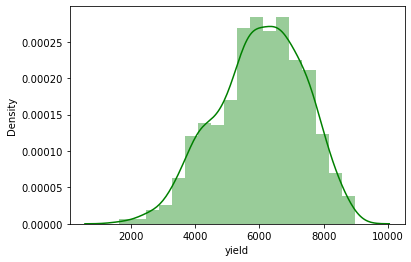

----------------------------------------------------------------------------
BoxPlot of yield



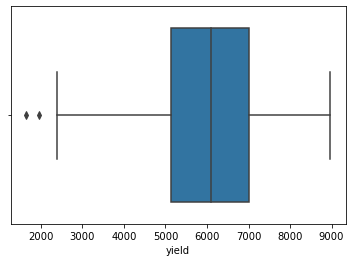

----------------------------------------------------------------------------


In [70]:
for column in list(df.columns):
    univariate_analysis(column,20)

#### Inferences

* From the histogram and KDE plots above, we can infer that many of the features have clusters within their distribution

* Some features have outliers in them and hence outlier treatment has to be performed

# Multivariate Analysis

<AxesSubplot:>

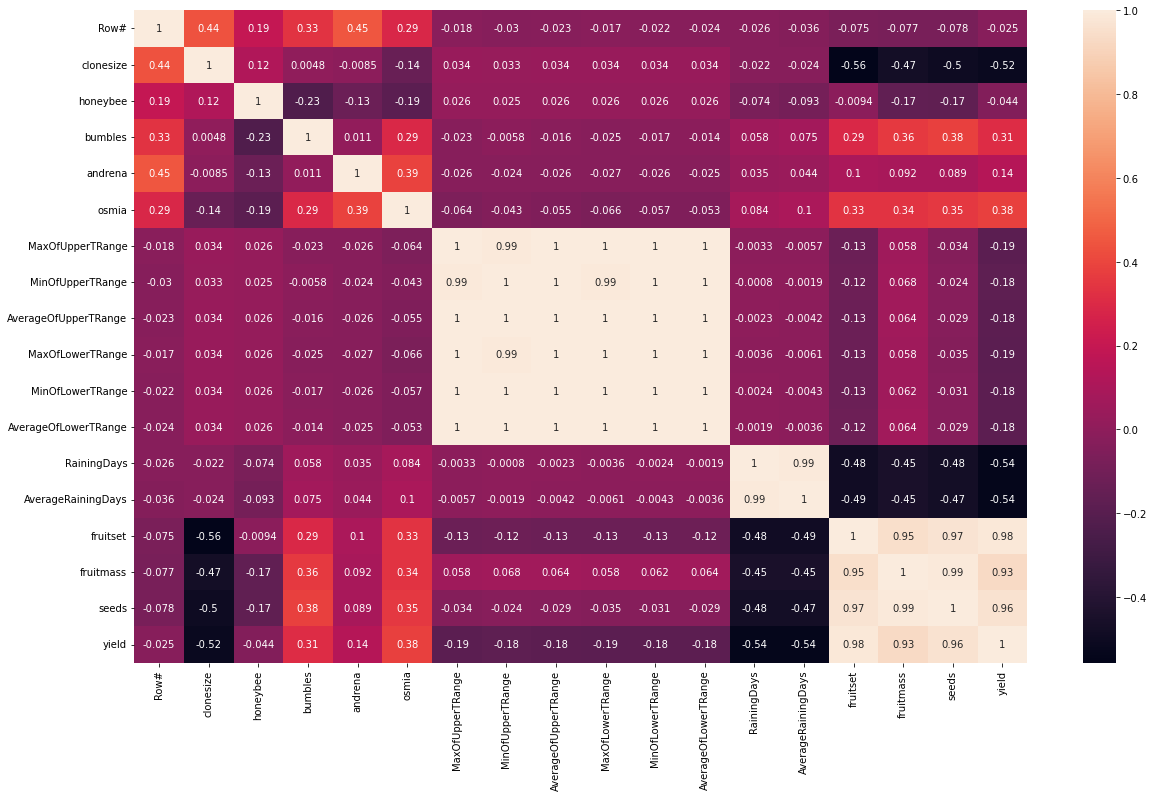

In [71]:
corr = df.corr()

plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True)

#### Inferences

* Columns fruitmass, seeds, fruitset have high correlations with the target variable. This is due to the fact that these features are generated based on the value of the yield.

* Columns MaxOfUpperTRange, MinOfUpperTRange, MaxOfLowerTRange, MinOfLowerTRange, RainingDays also have high correlations and could be droped.

In [72]:
# Droping highly correlated columns

df = df.drop(columns = ['Row#', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'RainingDays', 'fruitmass', 'fruitset', 'seeds'])

df.head()

,clonesize,honeybee,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,yield
0,37.5,0.75,0.25,0.25,0.25,71.9,50.8,0.26,3813.165795
1,37.5,0.75,0.25,0.25,0.25,71.9,50.8,0.10,4947.605663
2,37.5,0.75,0.25,0.25,0.25,79.0,55.9,0.26,3866.798965
3,37.5,0.75,0.25,0.25,0.25,79.0,55.9,0.10,4303.943030
4,37.5,0.75,0.25,0.25,0.25,71.9,50.8,0.39,3436.493543


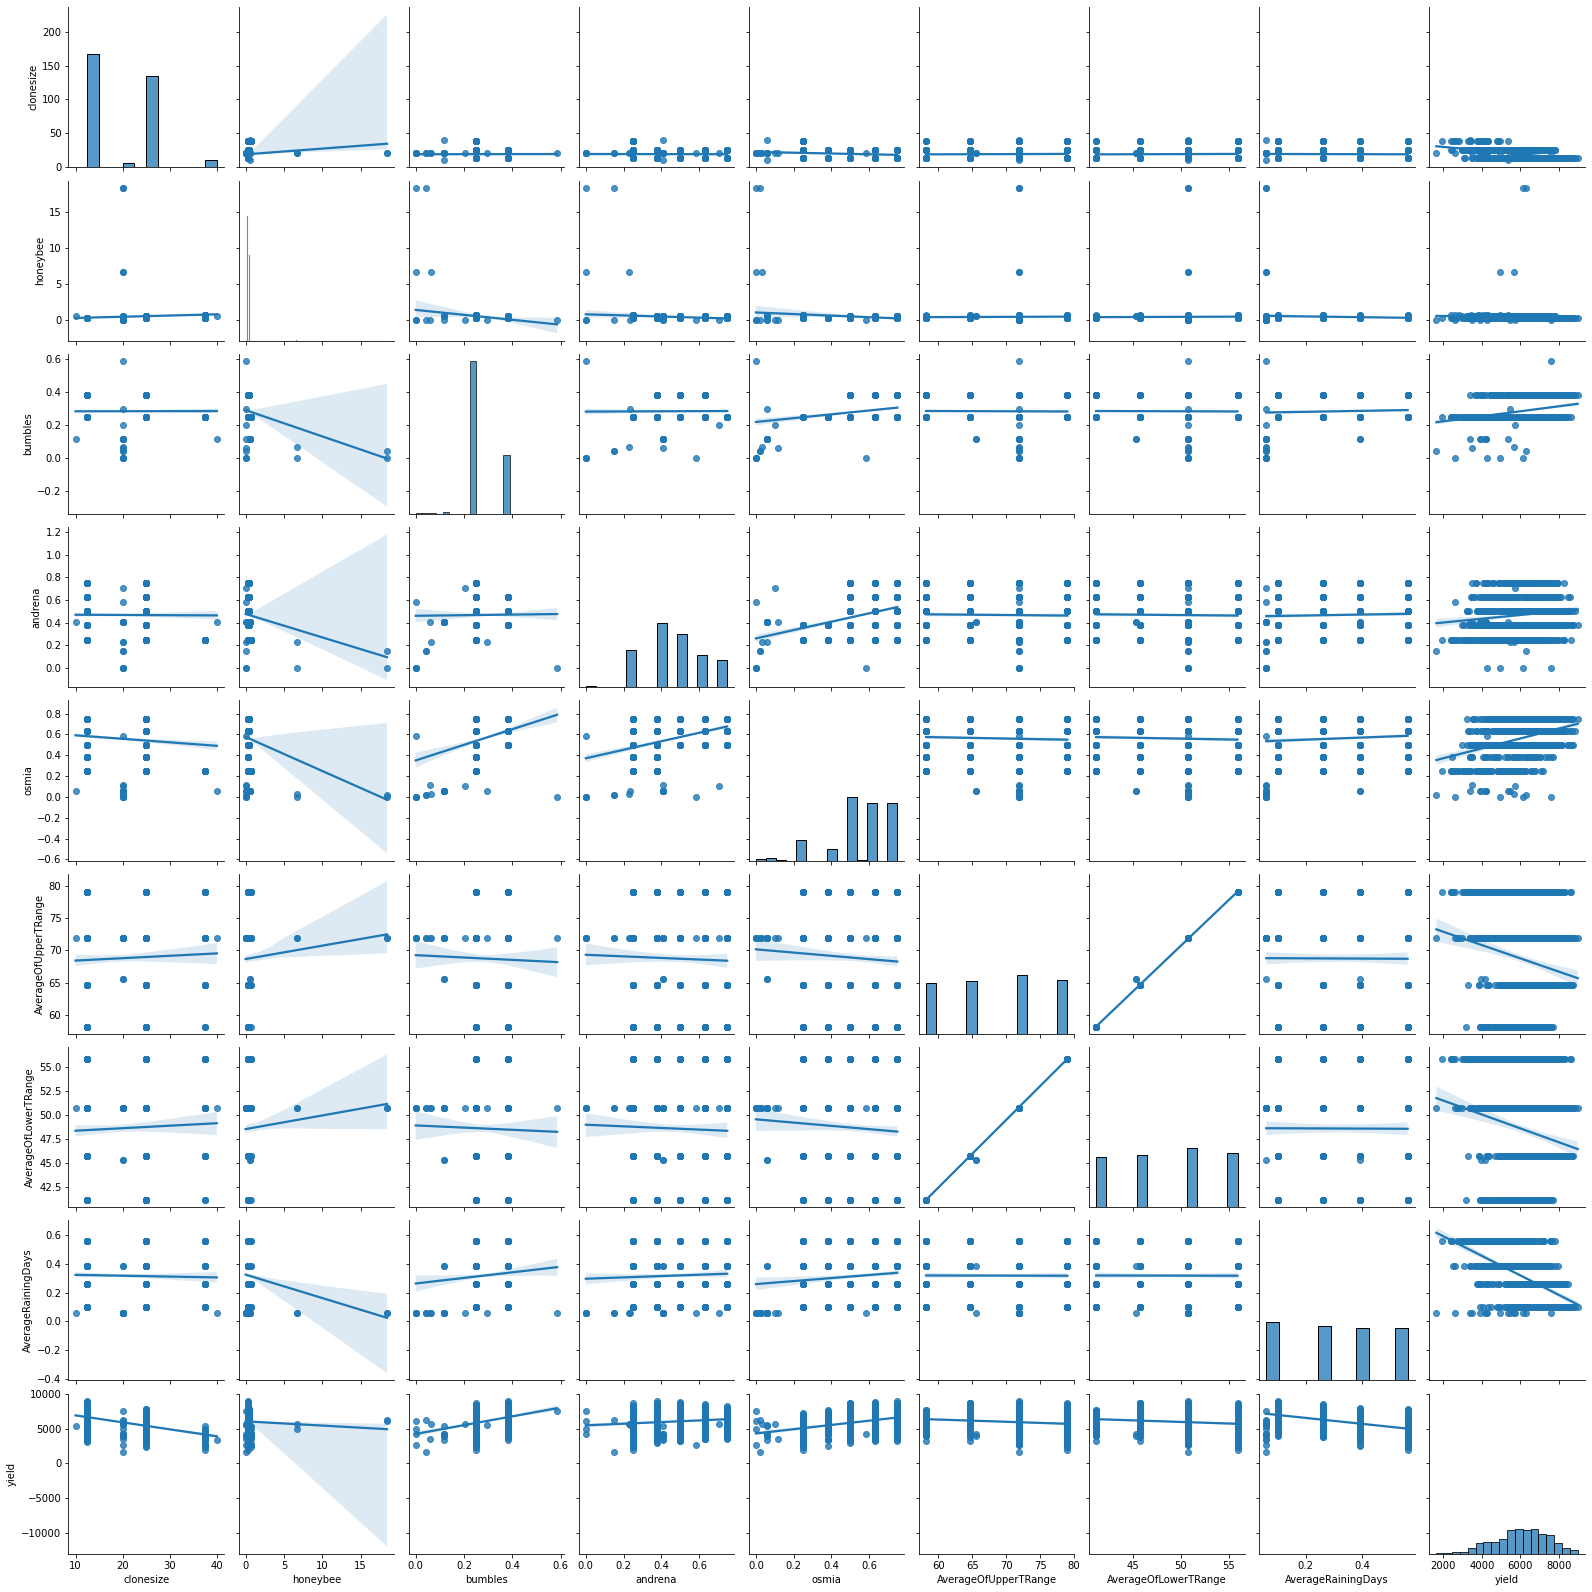

In [73]:
# Checking the pairplot of the dataset

sns.pairplot(df, kind='reg')

In [74]:
# splitting the dataset into input and target variables

X = df.drop('yield', axis=1)
Y = df['yield']

In [75]:
X.head()

,clonesize,honeybee,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays
0,37.5,0.75,0.25,0.25,0.25,71.9,50.8,0.26
1,37.5,0.75,0.25,0.25,0.25,71.9,50.8,0.10
2,37.5,0.75,0.25,0.25,0.25,79.0,55.9,0.26
3,37.5,0.75,0.25,0.25,0.25,79.0,55.9,0.10
4,37.5,0.75,0.25,0.25,0.25,71.9,50.8,0.39


In [76]:
Y.head()

0    3813.165795
1    4947.605663
2    3866.798965
3    4303.943030
4    3436.493543
Name: yield, dtype: float64

# Outlier Treatment

In [77]:
# function to calculate outlier proportion
def get_outlier_proportion(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    #calculation for proportion
    temp=[]
    for i in col:
        if (i>upper_range) or (i<lower_range):
            temp.append(i)
    proportion = len(temp)/len(col)
    return proportion

In [78]:
print('Proportion of outliers')
for column in df.columns:
    print('{column}: {proportion:.2f}%'.format(column=column,proportion=(get_outlier_proportion(df[column])*100)))

Proportion of outliers
clonesize: 0.00%
honeybee: 0.51%
bumbles: 0.90%
andrena: 0.51%
osmia: 2.19%
AverageOfUpperTRange: 0.00%
AverageOfLowerTRange: 0.00%
AverageRainingDays: 0.00%
yield: 0.26%


In [79]:
# Finding the Inter Quarter Range of each features

Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

clonesize               12.50
honeybee                 0.25
bumbles                  0.13
andrena                  0.25
osmia                    0.25
AverageOfUpperTRange     7.20
AverageOfLowerTRange     5.00
AverageRainingDays       0.29
dtype: float64


In [80]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3= np.percentile(col,[25,75])
    IQR= Q3-Q1
    lower_range= Q1-(1.5*IQR)
    upper_range= Q3+(1.5*IQR)
    return lower_range, upper_range

In [81]:
for column in df.columns:
    lr,ur= remove_outlier(df[column])
    df[column]= np.where(df[column]>ur,ur,df[column])
    df[column]= np.where(df[column]<lr,lr,df[column])

Description of clonesize

count    777.000000
mean      18.767696
std        6.999063
min       10.000000
25%       12.500000
50%       12.500000
75%       25.000000
max       40.000000
Name: clonesize, dtype: float64
----------------------------------------------------------------------------
Distribution of clonesize



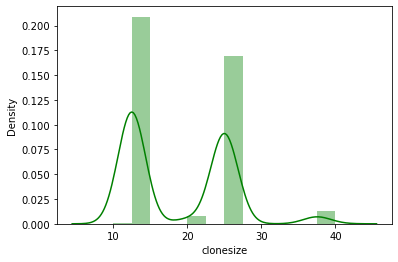

----------------------------------------------------------------------------
BoxPlot of clonesize



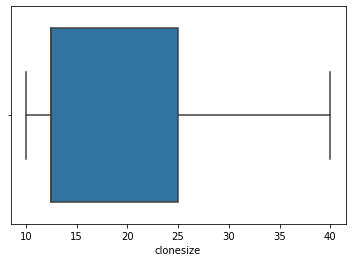

----------------------------------------------------------------------------
Description of honeybee

count    777.000000
mean       0.357107
std        0.140269
min        0.000000
25%        0.250000
50%        0.250000
75%        0.500000
max        0.875000
Name: honeybee, dtype: float64
----------------------------------------------------------------------------
Distribution of honeybee



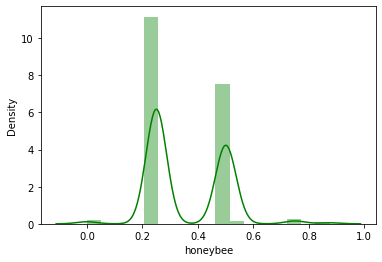

----------------------------------------------------------------------------
BoxPlot of honeybee



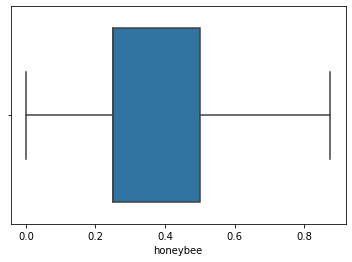

----------------------------------------------------------------------------
Description of bumbles

count    777.000000
mean       0.282692
std        0.065065
min        0.055000
25%        0.250000
50%        0.250000
75%        0.380000
max        0.575000
Name: bumbles, dtype: float64
----------------------------------------------------------------------------
Distribution of bumbles



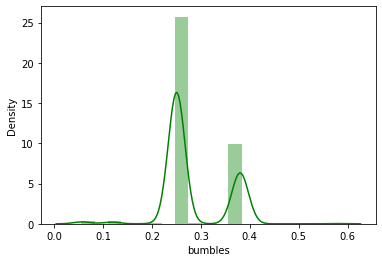

----------------------------------------------------------------------------
BoxPlot of bumbles



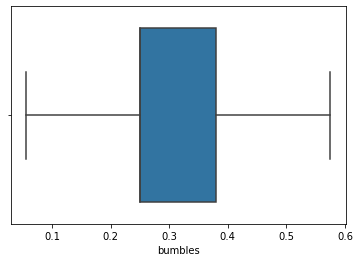

----------------------------------------------------------------------------
Description of andrena

count    777.000000
mean       0.468843
std        0.160977
min        0.005000
25%        0.380000
50%        0.500000
75%        0.630000
max        0.750000
Name: andrena, dtype: float64
----------------------------------------------------------------------------
Distribution of andrena



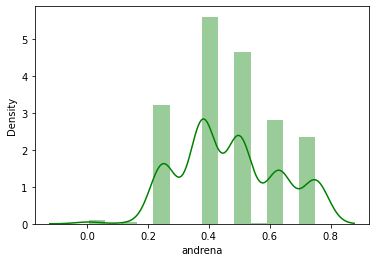

----------------------------------------------------------------------------
BoxPlot of andrena



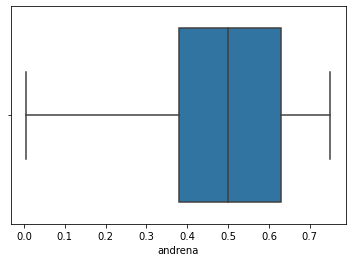

----------------------------------------------------------------------------
Description of osmia

count    777.000000
mean       0.563822
std        0.163984
min        0.125000
25%        0.500000
50%        0.630000
75%        0.750000
max        0.750000
Name: osmia, dtype: float64
----------------------------------------------------------------------------
Distribution of osmia



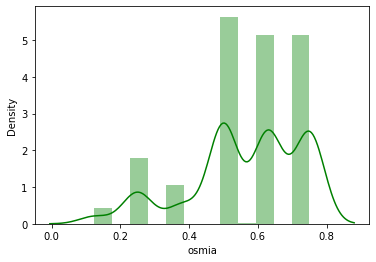

----------------------------------------------------------------------------
BoxPlot of osmia



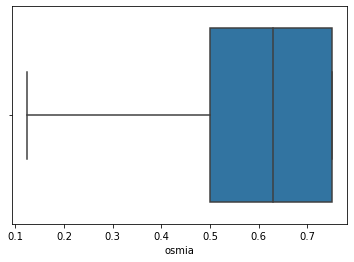

----------------------------------------------------------------------------
Description of AverageOfUpperTRange

count    777.000000
mean      68.723037
std        7.676984
min       58.200000
25%       64.700000
50%       71.900000
75%       71.900000
max       79.000000
Name: AverageOfUpperTRange, dtype: float64
----------------------------------------------------------------------------
Distribution of AverageOfUpperTRange



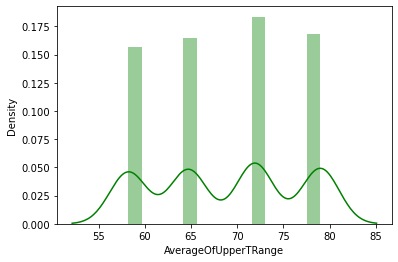

----------------------------------------------------------------------------
BoxPlot of AverageOfUpperTRange



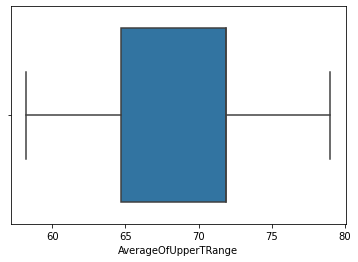

----------------------------------------------------------------------------
Description of AverageOfLowerTRange

count    777.000000
mean      48.613127
std        5.417072
min       41.200000
25%       45.800000
50%       50.800000
75%       50.800000
max       55.900000
Name: AverageOfLowerTRange, dtype: float64
----------------------------------------------------------------------------
Distribution of AverageOfLowerTRange



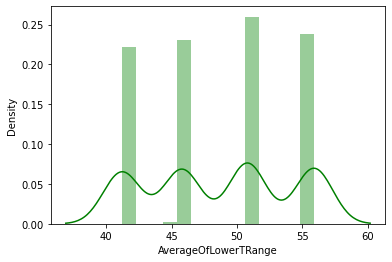

----------------------------------------------------------------------------
BoxPlot of AverageOfLowerTRange



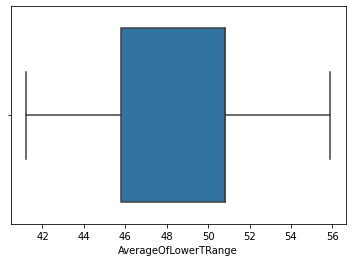

----------------------------------------------------------------------------
Description of AverageRainingDays

count    777.000000
mean       0.320000
std        0.171279
min        0.060000
25%        0.100000
50%        0.260000
75%        0.390000
max        0.560000
Name: AverageRainingDays, dtype: float64
----------------------------------------------------------------------------
Distribution of AverageRainingDays



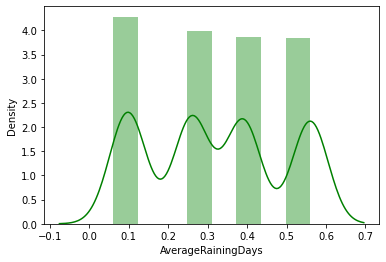

----------------------------------------------------------------------------
BoxPlot of AverageRainingDays



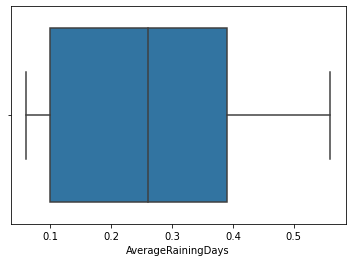

----------------------------------------------------------------------------
Description of yield

count     777.000000
mean     6014.103310
std      1353.246186
min      2278.852656
25%      5124.854901
50%      6107.382466
75%      7022.189731
max      8969.401842
Name: yield, dtype: float64
----------------------------------------------------------------------------
Distribution of yield



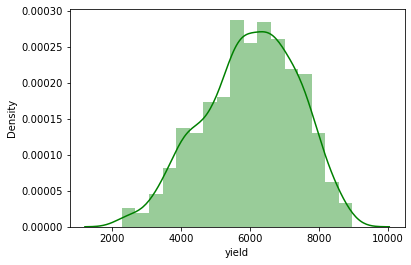

----------------------------------------------------------------------------
BoxPlot of yield



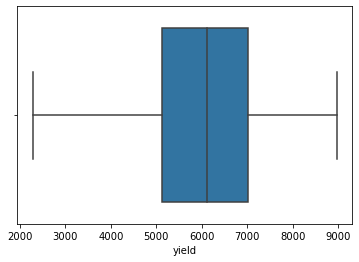

----------------------------------------------------------------------------


In [82]:
for column in list(df.columns):
    univariate_analysis(column,20)

In [83]:
# All the outliers have been removed

# Feature Selection

In [84]:
# checking the dimensions of the dataset again

df.shape

(777, 9)

In [85]:
df.head()

,clonesize,honeybee,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,yield
0,37.5,0.75,0.25,0.25,0.25,71.9,50.8,0.26,3813.165795
1,37.5,0.75,0.25,0.25,0.25,71.9,50.8,0.10,4947.605663
2,37.5,0.75,0.25,0.25,0.25,79.0,55.9,0.26,3866.798965
3,37.5,0.75,0.25,0.25,0.25,79.0,55.9,0.10,4303.943030
4,37.5,0.75,0.25,0.25,0.25,71.9,50.8,0.39,3436.493543


In [86]:
# Feature selection is performed on basis of correlation levels to the target variable

def feature_selection_corr_based( X_train, Y_train, X_test, n_features='all'):
    if type(n_features) == str:
        fs = SelectKBest(score_func= f_regression, k='all')
    else:
        fs = SelectKBest(score_func= f_regression, k = n_features)
        
    fs.fit( X_train, Y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs, X_test_fs, fs

In [87]:
# splitting the data into train and test datasets

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=1)


In [88]:
X_train.shape

(543, 8)

In [89]:
X_test.shape

(234, 8)

In [90]:
X_train_fs, X_test_fs, fs_corr = feature_selection_corr_based(X_train, Y_train, X_test, n_features='all')

In [91]:
# Output of X_train after feature selection
X_train_fs

array([[12.5 ,  0.25,  0.25, ..., 79.  , 55.9 ,  0.1 ],
       [12.5 ,  0.25,  0.25, ..., 71.9 , 50.8 ,  0.56],
       [25.  ,  0.5 ,  0.25, ..., 79.  , 55.9 ,  0.39],
       ...,
       [12.5 ,  0.25,  0.25, ..., 71.9 , 50.8 ,  0.56],
       [12.5 ,  0.25,  0.25, ..., 64.7 , 45.8 ,  0.26],
       [25.  ,  0.25,  0.25, ..., 64.7 , 45.8 ,  0.39]])

In [92]:
# defining a function to plot the features selection output columns and their scores
def fs_score_plot(fs_func):
    for i in range(len(fs_func.get_feature_names_out())):
        print('Feature %s: %f' %(fs_func.get_feature_names_out()[i], fs_func.scores_[i]))
    plt.bar(fs_func.get_feature_names_out(), fs_func.scores_)
    plt.xticks(rotation=90)
    plt.show()

Feature clonesize: 195.182884
Feature honeybee: 1.234143
Feature bumbles: 53.378632
Feature andrena: 11.267955
Feature osmia: 102.944595
Feature AverageOfUpperTRange: 10.851435
Feature AverageOfLowerTRange: 10.717352
Feature AverageRainingDays: 230.510778


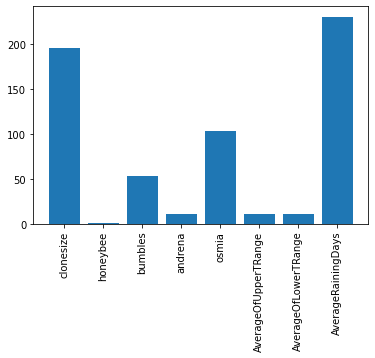

In [93]:
fs_score_plot(fs_corr)

#### Inference:

* Based on our requirement, we can choose the number of features we need, the model will gives us the best N features based on the correlation values

# Modelling

* Let us train the model on top 7 features out of 9 features
* We will be using the models - Linear Regression, Random Forest, Decision Tree, XGBoost

In [94]:
X_train_fs, X_test_fs, fs_corr = feature_selection_corr_based(X_train, Y_train, X_test, n_features=7)

## Linear Regression

In [95]:
lreg = LinearRegression()
lreg.fit(X_train_fs, Y_train)
y_pred = lreg.predict(X_test_fs)

In [96]:
mae_linear = mean_absolute_error(Y_test, y_pred)
mse_linear = mean_squared_error(Y_test, y_pred)
rmse_linear = np.sqrt(mse_linear)
rsq_linear = r2_score(Y_test, y_pred)

print('MAE: %.3f' % mae_linear)
print('MSE: %.3f' % mse_linear)
print('RMSE: %.3f' % rmse_linear)
print('R-Square: %.3f' % rsq_linear)

MAE: 527.769
MSE: 390814.582
RMSE: 625.152
R-Square: 0.802


## Decision Tree Regression

In [97]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train_fs, Y_train)
y_pred = dtree.predict(X_test_fs)

In [98]:
mae_dtree = mean_absolute_error(Y_test, y_pred)
mse_dtree = mean_squared_error(Y_test, y_pred)
rmse_dtree = np.sqrt(mse_linear)
rsq_dtree = r2_score(Y_test, y_pred)

print('MAE: %.3f' % mae_dtree)
print('MSE: %.3f' % mse_dtree)
print('RMSE: %.3f' % rmse_dtree)
print('R-Square: %.3f' % rsq_dtree)

MAE: 261.908
MSE: 153893.416
RMSE: 625.152
R-Square: 0.922


### RandomForest Regression

In [99]:
rf = RandomForestRegressor()

rf.fit(X_train_fs, Y_train)
    
y_pred = rf.predict(X_test_fs)

In [100]:
mae_rf = mean_absolute_error(Y_test, y_pred)
mse_rf = mean_squared_error(Y_test, y_pred)
rmse_rf = np.sqrt(mse_linear)
rsq_rf = r2_score(Y_test, y_pred)

print('MAE: %.3f' % mae_rf)
print('MSE: %.3f' % mse_rf)
print('RMSE: %.3f' % rmse_rf)
print('R-Square: %.3f' % rsq_rf)

MAE: 222.957
MSE: 114140.283
RMSE: 625.152
R-Square: 0.942


## XGB Regression

In [101]:
xgb = XGBRegressor()
xgb.fit(X_train_fs, Y_train)
y_pred = xgb.predict(X_test_fs)

In [102]:
mae_xgb = mean_absolute_error(Y_test, y_pred)
mse_xgb = mean_squared_error(Y_test, y_pred)
rmse_xgb = np.sqrt(mse_linear)
rsq_xgb = r2_score(Y_test, y_pred)

print('MAE: %.3f' % mae_xgb)
print('MSE: %.3f' % mse_xgb)
print('RMSE: %.3f' % rmse_xgb)
print('R-Square: %.3f' % rsq_xgb)

MAE: 208.532
MSE: 130733.981
RMSE: 625.152
R-Square: 0.934


# Model Evaluation

In [103]:
# The aim of evaluation would be to reduce RMSE and MAE values

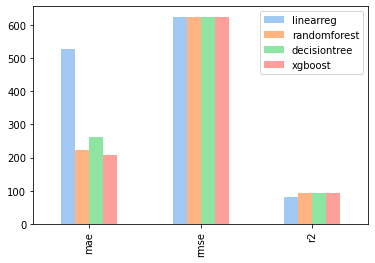

In [104]:
metrics = {
    "linearreg": {
        "mae": mae_linear,
        "rmse": rmse_linear,
        'r2': rsq_linear*100
    },
    "randomforest": {
        "mae": mae_rf,
        "rmse": rmse_rf,
        'r2': rsq_rf*100
    },
    "decisiontree": {
        "mae": mae_dtree,
        "rmse": rmse_dtree,
        'r2': rsq_dtree*100
    },
    "xgboost": {
        "mae": mae_xgb,
        "rmse": rmse_xgb,
        'r2': rsq_xgb*100
    },
}

pd.DataFrame(metrics).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[0], 
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3]]);

In [105]:
metrics_df = pd.DataFrame(metrics).T
metrics_df.head()

,mae,rmse,r2
linearreg,527.768911,625.151647,80.206399
randomforest,222.956763,625.151647,94.219133
decisiontree,261.907576,625.151647,92.205754
xgboost,208.531902,625.151647,93.378711


In [106]:
# sorting metrics by ascending order of r2

metrics_df.sort_values('r2')

,mae,rmse,r2
linearreg,527.768911,625.151647,80.206399
decisiontree,261.907576,625.151647,92.205754
xgboost,208.531902,625.151647,93.378711
randomforest,222.956763,625.151647,94.219133


In [107]:
# sorting metrics by ascending order of mae

metrics_df.sort_values('mae')

,mae,rmse,r2
xgboost,208.531902,625.151647,93.378711
randomforest,222.956763,625.151647,94.219133
decisiontree,261.907576,625.151647,92.205754
linearreg,527.768911,625.151647,80.206399


In [108]:
# sorting metrics by ascending order of rmse

metrics_df.sort_values('rmse')

,mae,rmse,r2
linearreg,527.768911,625.151647,80.206399
randomforest,222.956763,625.151647,94.219133
decisiontree,261.907576,625.151647,92.205754
xgboost,208.531902,625.151647,93.378711


# Hyperparameter Tuning

In [109]:
# making use of gridsearch cv to get the optimum parameter combination for each model
# Note: X_train can also be used instead of X_train_fs

X_train_fs, X_test_fs, fs_corr = feature_selection_corr_based(X_train, Y_train, X_test, n_features='all')

cv = RepeatedKFold(n_splits= 50, n_repeats= 3, random_state=1)
fs_corr = SelectKBest(score_func=f_regression)

#pipeline for linear regression
pipe_lr = Pipeline([
    ('feature_selector',fs_corr),
    ('model', LinearRegression())
])

pipe_rf = Pipeline([
    ('feature_selector',fs_corr),
    ('model', RandomForestRegressor(random_state=1))
])

pipe_dtree = Pipeline([
    ('feature_selector',fs_corr),
    ('model', DecisionTreeRegressor(random_state=1))
])

pipe_xgb = Pipeline([
    ('feature_selector',fs_corr),
    ('model', XGBRegressor(random_state=1))
])


In [110]:
grid_params_lr = {
        'feature_selector__k': [i for i in range(X_train_fs.shape[1]-6, X_train_fs.shape[1]-4)],
        }

grid_params_rf = {
        'feature_selector__k': [i for i in range(X_train_fs.shape[1]-6, X_train_fs.shape[1]-4)],
        'model__max_depth': [15, 18, 10],
        'model__min_samples_split': [15, 18, 10]
                  }

grid_params_dtree = {
                     'feature_selector__k': [i for i in range(X_train_fs.shape[1]-6, X_train_fs.shape[1]-4)],
                     'model__max_depth': [15, 18, 10],
                     'model__max_features': ['auto', 'sqrt']
                     }

grid_params_xgb = {
                    'feature_selector__k': [i for i in range(X_train_fs.shape[1]-6, X_train_fs.shape[1]-4)],
                    'model__max_depth': [9,12],
                    'model__min_child_weight': [7,8],
                    'model__subsample': [i/10. for i in range(9,11)]
                   }

In [111]:
LR = GridSearchCV(
            estimator=pipe_lr,
            param_grid=grid_params_lr,
            scoring='neg_mean_absolute_error',
            cv=cv
)

RF = GridSearchCV(
            estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1
)

DT = GridSearchCV(
            estimator=pipe_dtree,
            param_grid=grid_params_dtree,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1
)

XGB = GridSearchCV(
            estimator=pipe_xgb,
            param_grid=grid_params_xgb,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1
)

In [113]:
grids = [LR,RF,XGB,DT]

# Creating a dict for our reference
grid_dict = {0: 'Linear Regression', 
        1: 'Random Forest',
        2: 'XGBoost',
        3: 'Decision Tree'}

In [114]:
# This function iterates through each model's pipeline and across its gridsearchcv and finds the best parameters and returns the
# metrics of the best model regressor
 
def extract_best_model(grids: list, grid_dict: dict):
    print('Performing model optimizations...')
    least_mae = 270817
    best_regr = 0
    best_gs = ''
    for idx, gs in enumerate(grids):
        print('\nEstimator: %s' % grid_dict[idx])
        gs.fit(X_train_fs, Y_train)
        print('Best Config: %s' % gs.best_params_)
        # Best training data accuracy
        print('Best MAE: %.3f' % gs.best_score_)
        # Predict on test data with best params
        y_pred = gs.predict(X_test_fs)
        # Test data accuracy of model with best params
        print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(Y_test, y_pred))
        print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(Y_test, y_pred)))
        
        # Track best (least test error) model
        if mean_absolute_error(Y_test, y_pred) < least_mae:
            least_mae = mean_absolute_error(Y_test, y_pred)
            best_gs = gs
            best_regr = idx
    print('\nClassifier with least test set MAE: %s' % grid_dict[best_regr])

    
    return (grid_dict[best_regr], best_gs, least_mae)

In [115]:
best_model_name, best_model, least_mae = extract_best_model(grids= grids, grid_dict = grid_dict)

print(f"Best Model: {best_model_name}")
print(f"Error Rate: {least_mae}")
print(best_model)

Performing model optimizations...

Estimator: Linear Regression
Best Config: {'feature_selector__k': 3}
Best MAE: -559.540
Test set mean absolute error for best params: 599.954 
Test set root mean squared error for best params: 24.494 

Estimator: Random Forest
Best Config: {'feature_selector__k': 3, 'model__max_depth': 15, 'model__min_samples_split': 18}
Best MAE: -547.541
Test set mean absolute error for best params: 622.533 
Test set root mean squared error for best params: 24.951 

Estimator: XGBoost
Best Config: {'feature_selector__k': 3, 'model__max_depth': 12, 'model__min_child_weight': 8, 'model__subsample': 0.9}
Best MAE: -541.822
Test set mean absolute error for best params: 600.028 
Test set root mean squared error for best params: 24.495 

Estimator: Decision Tree
Best Config: {'feature_selector__k': 3, 'model__max_depth': 15, 'model__max_features': 'auto'}
Best MAE: -559.787
Test set mean absolute error for best params: 601.112 
Test set root mean squared error for best pa

## We can see that Linear Regression model gave us the best overall metrics. For now lets proceed with this model for deployment

In [116]:
import joblib

In [120]:
joblib.dump(best_model, 'Linear_Regression_Optimum_Model.joblib')

['Linear_Regression_Optimum_Model.joblib']